In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_df_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
df_market_data_scaled.index = market_data_df.index
# Set the coinid column as index
#df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []

# Create an empty list to store the inertia values
k = list(range(1,11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, n_init='auto', random_state=0)
    km.fit(df_market_data_scaled)
    inertia.append(km.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow = pd.DataFrame(elbow_data)
# Display the DataFrame
df_elbow

c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

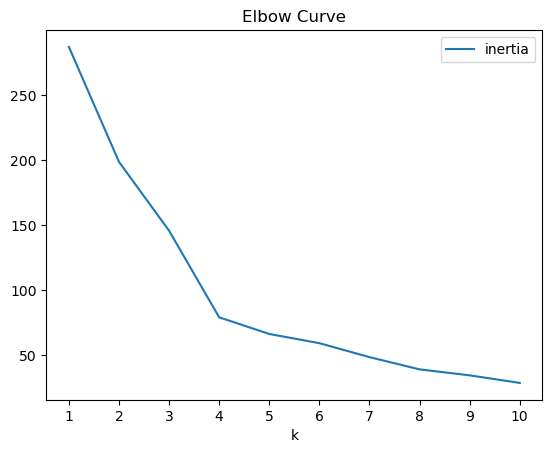

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 appears to be the best value for 'k'. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=0)

In [10]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_predictions_4 = model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
print(market_data_predictions_4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [12]:
# Create a copy of the DataFrame
market_data_predictions_4_df = df_market_data_scaled.copy()

In [13]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions_4_df["cluster"] = market_data_predictions_4

# Display sample data
market_data_predictions_4_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [22]:
market_data_predictions_4_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
 7   cluster                       41 non-null     int32  
dtypes: float64(7), int32(1)
memory usage: 3.8+ KB


c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

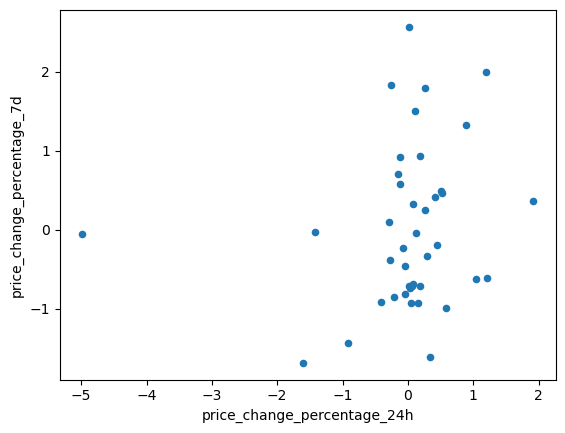

In [14]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_predictions_4_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [16]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_market_data_scaled = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
pca_market_data_scaled[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [17]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  About 90% of the total variance is condensed into these 3 PCA variables. 

In [20]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
df_market_data_pca = pd.DataFrame(pca_market_data_scaled, columns=["PCA1", "PCA2", "PCA3"])
    
# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
df_market_data_pca['coin_id'] = market_data_df.index

# Set the coinid column as index
df_market_data_pca = df_market_data_pca.set_index('coin_id')

# Display sample data
df_market_data_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [25]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []
k = list(range(1, 11))
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_pca)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

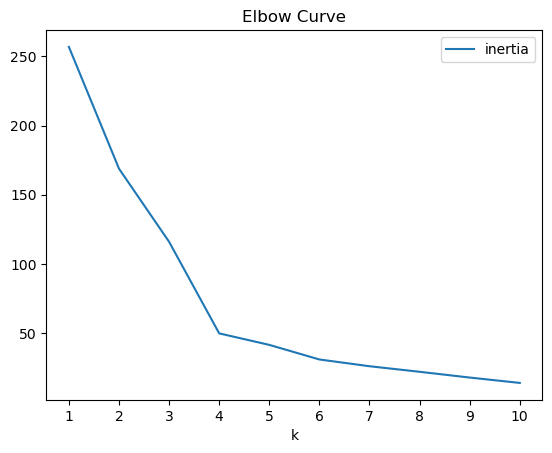

In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' is 4. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No. This is the same reult when using the original data. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=0)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(df_market_data_pca)

c:\Users\tbord\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = model.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [36]:
# Create a copy of the DataFrame with the PCA data
crypto_predictions_df = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_predictions_df['cluster'] = cluster_predictions

# Display sample data
crypto_predictions_df.head()

,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [42]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas


In [43]:
crypto_predictions_df.hvplot.scatter(x="PCA1", y="PCA2")

:Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [53]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(data=pca.components_.T, columns=["PCA1", "PCA2", "PCA3"],index=df_market_data_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The strongest positive influence on PCA1 is "price_change_percentage_200d" at 59%. The strongest negative influence on PCA1 is "price_change_percentage_24h" at -0.416728. 
The strongest positive influence on PCA2 is "price_change_percentage_30d" at 56%. The strongest and only negative influence on PCA2 is "price_change_percentage_1y" at -0.150789. 
The strongest positive influence on PCA3 is "price_change_percentage_7d" at 79%. The strongest negative influence on PCA3 is "price_change_percentage_60d" at -0.361377. 


    